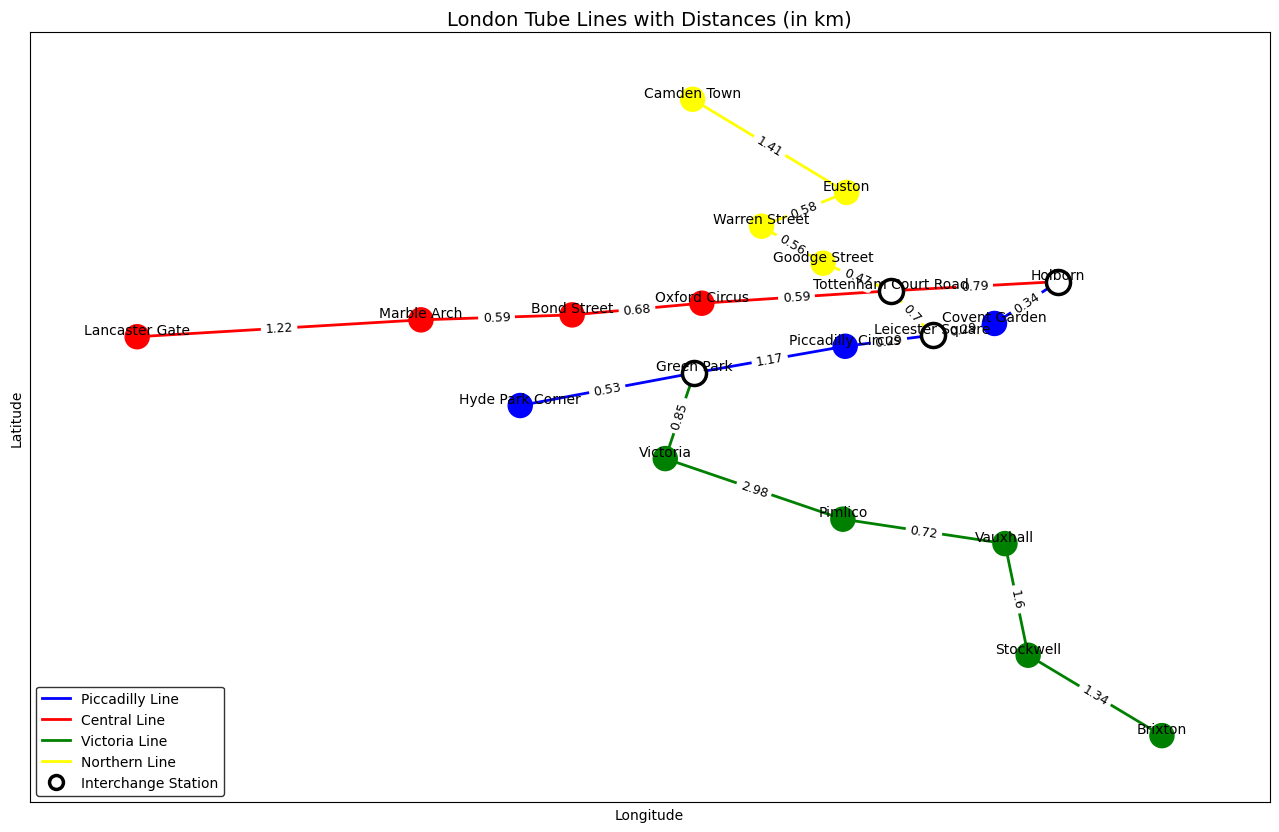

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Manually define station positions
positions = {
    "Camden Town": (-0.142452, 51.539969),
    "Euston": (-0.133296, 51.528664),
    "Warren Street": (-0.138351, 51.524563),
    "Goodge Street": (-0.134695, 51.520071),
    "Tottenham Court Road": (-0.130654, 51.516725),
    "Holborn": (-0.120713, 51.517839),
    "Oxford Circus": (-0.141903, 51.515217),
    "Bond Street": (-0.149614, 51.513797),
    "Marble Arch": (-0.158600, 51.513197),
    "Lancaster Gate": (-0.175471, 51.511148),
    "Hyde Park Corner": (-0.1527, 51.5028),
    "Green Park": (-0.142356, 51.506756),
    "Victoria": (-0.144078, 51.496361),
    "Pimlico": (-0.133519, 51.489006),
    "Brixton": (-0.114552, 51.462737),
    "Stockwell": (-0.122505, 51.472495),
    "Vauxhall": (-0.123885, 51.486042),
    "Covent Garden": (-0.124507, 51.51276),
    "Leicester Square": (-0.128185, 51.511334),
    "Piccadilly Circus": (-0.133384, 51.509993)
}

# Define edges with weights (distances in km) and line colors
edges = [
    ("Camden Town", "Euston", 1.41, 'yellow'),
    ("Euston", "Warren Street", 0.58, 'yellow'),
    ("Warren Street", "Goodge Street", 0.56, 'yellow'),
    ("Goodge Street", "Tottenham Court Road", 0.47, 'yellow'),
    ("Tottenham Court Road", "Leicester Square", 0.70, 'yellow'),
    ("Tottenham Court Road", "Holborn", 0.79, 'red'),
    ("Holborn", "Covent Garden", 0.34, 'blue'),
    ("Covent Garden", "Leicester Square", 0.29, 'blue'),
    ("Leicester Square", "Piccadilly Circus", 0.29, 'blue'),
    ("Piccadilly Circus", "Green Park", 1.17, 'blue'),
    ("Green Park", "Hyde Park Corner", 0.53, 'blue'),
    ("Green Park", "Victoria", 0.85, 'green'),
    ("Victoria", "Pimlico", 2.98, 'green'),
    ("Stockwell", "Brixton", 1.34, 'green'),
    ("Vauxhall", "Stockwell", 1.60, 'green'),
    ("Bond Street", "Oxford Circus", 0.68, 'red'),
    ("Marble Arch", "Bond Street", 0.59, 'red'),
    ("Lancaster Gate", "Marble Arch", 1.22, 'red'),
    ("Vauxhall", "Pimlico", 0.72, 'green'),
    ("Oxford Circus", "Tottenham Court Road", 0.59, 'red')
]

# Define interchange stations that will have white color with black border
interchange_stations = {"Tottenham Court Road", "Leicester Square", "Green Park", "Holborn"}

# Define station colors based on the line color
station_colors = {}
for edge in edges:
    station1, station2, _, color = edge
    if station1 not in interchange_stations:
        station_colors[station1] = color
    if station2 not in interchange_stations:
        station_colors[station2] = color

# Set interchange stations to white
for station in interchange_stations:
    station_colors[station] = 'white'

# Add nodes and edges to the graph with distances as edge attributes
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2], color=edge[3])

# Extract edge colors
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
edge_labels = nx.get_edge_attributes(G, 'weight')

# Adjust label positions for better visibility (offset labels slightly)
label_positions = {key: (value[0], value[1] + 0.0008) for key, value in positions.items()}

# Draw nodes with customized color and border style
plt.figure(figsize=(16, 10))  # Increase figure size for better clarity

# Separate regular and interchange stations for custom styling
regular_stations = [node for node in G.nodes() if node not in interchange_stations]
interchange_stations_nodes = [node for node in interchange_stations]

# Draw regular stations
nx.draw_networkx_nodes(
    G,
    pos=positions,
    nodelist=regular_stations,
    node_color=[station_colors.get(node, "gray") for node in regular_stations],
    node_size=300
)

# Draw interchange stations with white fill and black thick border
nx.draw_networkx_nodes(
    G,
    pos=positions,
    nodelist=interchange_stations_nodes,
    node_color="white",         # Set color to white
    edgecolors="black",          # Black border
    node_size=300,
    linewidths=2.5,              # Thicker border width
    node_shape="o"               # Circle shape
)

# Draw edges with colors
nx.draw_networkx_edges(
    G,
    pos=positions,
    edge_color=edge_colors,
    width=2
)

# Draw the labels at adjusted positions with an offset for better readability
nx.draw_networkx_labels(G, pos=label_positions, labels={node: node for node in G.nodes()}, font_color="black", font_size=10, font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels, font_size=9, font_family='sans-serif')

# Add axis labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Title and customized legend
plt.title("London Tube Lines with Distances (in km)", fontsize=14)
plt.legend(
    handles=[
        plt.Line2D([0], [0], color='blue', lw=2, label='Piccadilly Line'),
        plt.Line2D([0], [0], color='red', lw=2, label='Central Line'),
        plt.Line2D([0], [0], color='green', lw=2, label='Victoria Line'),
        plt.Line2D([0], [0], color='yellow', lw=2, label='Northern Line'),
        plt.Line2D([0], [0], marker='o', color='white', markeredgewidth=2.5, markeredgecolor='black', markersize=10, linestyle='None', label='Interchange Station')  # Circle marker only
    ],
    loc='lower left',
    bbox_to_anchor=(0, 0),
    fancybox=True,
    edgecolor='black',
    facecolor='white'
)

plt.axis("on")  # Show axis for reference
plt.show()
